In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Read the sales data from the provided Excel file into a DataFrame
df_sales = pd.read_excel("/kaggle/input/superstore-sales/superstore_sales.xlsx")
df_sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
# Display the last few rows of the DataFrame
df_sales.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [4]:
# Check the shape of the DataFrame (number of rows and columns)
df_sales.shape

(51290, 21)

In [5]:
# Display concise summary of the DataFrame, including data types and non-null counts
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
# Check for missing values in the DataFrame
pd.isnull(df_sales)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Count the number of missing values in each column
pd.isnull(df_sales).sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
# Display the column names of the DataFrame
df_sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
# Convert the 'year' column to datetime format
df_sales["year"] = pd.to_datetime(df_sales["year"])

In [10]:
# Check the data type of the 'year' column
df_sales["year"].dtypes

dtype('<M8[ns]')

In [11]:
# Display basic statistics for numerical columns in the DataFrame
df_sales.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,1970-01-01 00:00:00.000002012
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,1970-01-01 00:00:00.000002011
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,1970-01-01 00:00:00.000002012
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,1970-01-01 00:00:00.000002013
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,1970-01-01 00:00:00.000002014
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,1970-01-01 00:00:00.000002014
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,NaN


In [12]:
# Display basic statistics for selected numerical columns in the DataFrame
df_sales[["sales",'quantity','discount','profit','shipping_cost']].describe()

,sales,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818
std,487.565361,2.278766,0.212280,174.424113,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [13]:
# Find the minimum value in the 'order_date' column
df_sales["order_date"].min()

Timestamp('2011-01-01 00:00:00')

In [14]:
# Find the maximum value in the 'order_date' column
df_sales["order_date"].max()

Timestamp('2014-12-31 00:00:00')

In [15]:
# Create a new column 'month_year' containing the year and month extracted from 'order_date'
df_sales["month_year"] = df_sales["order_date"].apply(lambda x : x.strftime("%Y-%m"))

In [16]:
df_sales["month_year"]

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [17]:
# Group the data by 'month_year' and calculate the sum of sales for each month
monthly_sales_sum = df_sales.groupby("month_year").sum("sales")

print(monthly_sales_sum)


                   sales  quantity  discount       profit  shipping_cost
month_year                                                              
2011-01      98898.48886      1463    68.758   8321.80096    10544.78800
2011-02      91152.15698      1224    52.252  12417.90698    10681.16300
2011-03     145729.36736      1836    74.212  15303.56826    13096.18550
2011-04     116915.76418      2020    80.782  12902.32438    12954.52000
2011-05     146747.83610      2013    82.382  12183.82870    16443.20600
2011-06     215207.38022      3112   159.534  23415.24702    23813.10900
2011-07     115510.41912      1774    80.086   5585.00352    11844.47600
2011-08     207581.49122      3035   121.462  23713.66772    22001.13600
2011-09     290214.45534      3707   137.678  35776.88394    29664.85100
2011-10     199071.26404      2727   110.192  25963.41834    21380.08200
2011-11     298496.53752      4039   178.836  32709.17772    34701.99800
2011-12     333925.73460      4493   187.220  40647

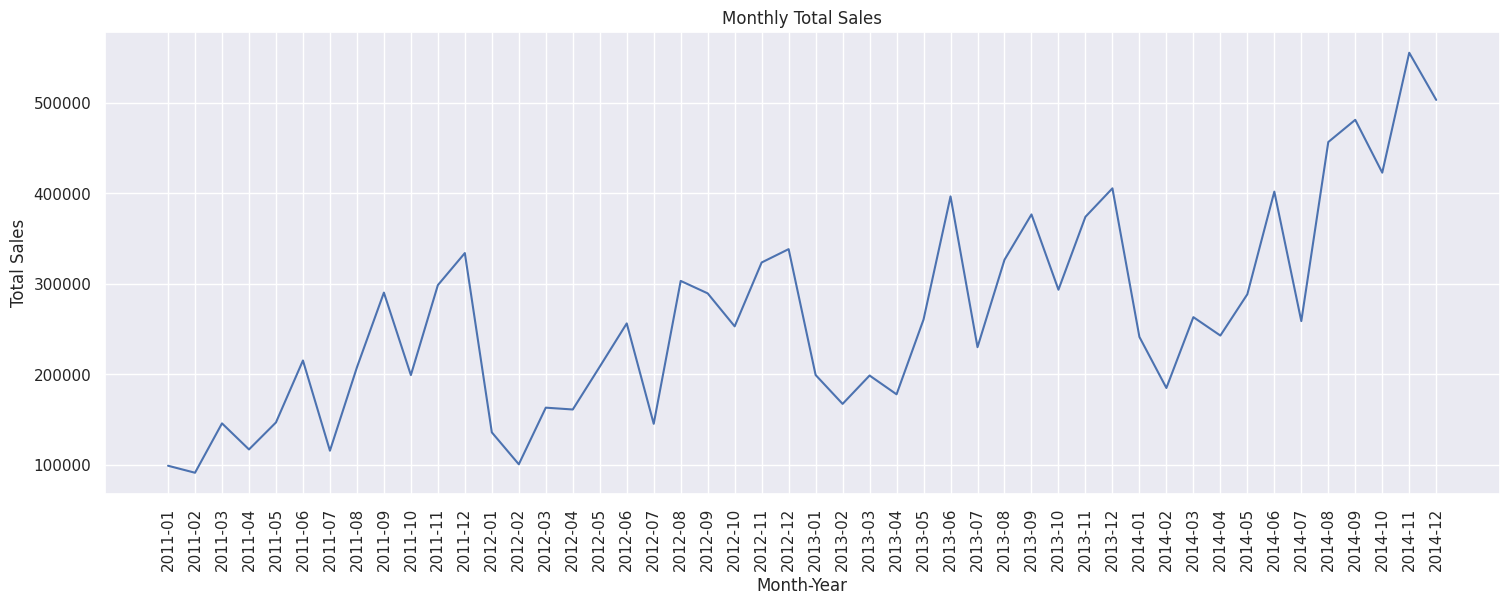

In [18]:
# Plot the total sales for each month
sns.set(rc={"figure.figsize": (18, 6)})
plt.plot(monthly_sales_sum.index, monthly_sales_sum['sales'])
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Monthly Total Sales")
plt.xticks(rotation=90)
plt.show()


In [19]:
# Group the data by 'product_name' and calculate the sum of sales for each product
prod_sales = pd.DataFrame(df_sales.groupby("product_name").sum("sales"))
prod_sales

,sales,quantity,discount,profit,shipping_cost
product_name,,,,,
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95
...,...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660,24,0.4,115.6440,28.12
iOttie HLCRIO102 Car Mount,215.892,12,0.8,-11.9940,51.19
iOttie XL Car Mount,223.888,14,0.4,-50.3748,18.64


In [20]:
# Sort the products by total sales in descending order
prod_sales=prod_sales.sort_values("sales",ascending = False)

In [21]:
# Display the top 10 products by total sales
prod_sales[:10]

,sales,quantity,discount,profit,shipping_cost
product_name,,,,,
"Apple Smart Phone, Full Size",86935.7786,171,5.44,5921.5786,8027.71500
"Cisco Smart Phone, Full Size",76441.5306,139,2.07,17238.5206,7065.16600
"Motorola Smart Phone, Full Size",73156.3030,134,5.61,17027.1130,8817.33100
"Nokia Smart Phone, Full Size",71904.5555,147,6.79,9938.1955,7852.66300
Canon imageCLASS 2200 Advanced Copier,61599.8240,20,0.60,25199.9280,1276.32054
"Hon Executive Leather Armchair, Adjustable",58193.4841,169,8.11,5997.2541,5751.54100
"Office Star Executive Leather Armchair, Adjustable",50661.6840,141,6.47,4710.9840,5141.73400
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160,142,6.98,10427.3260,6548.16500
"Samsung Smart Phone, Cordless",48653.4600,108,3.26,-198.0900,5892.07400


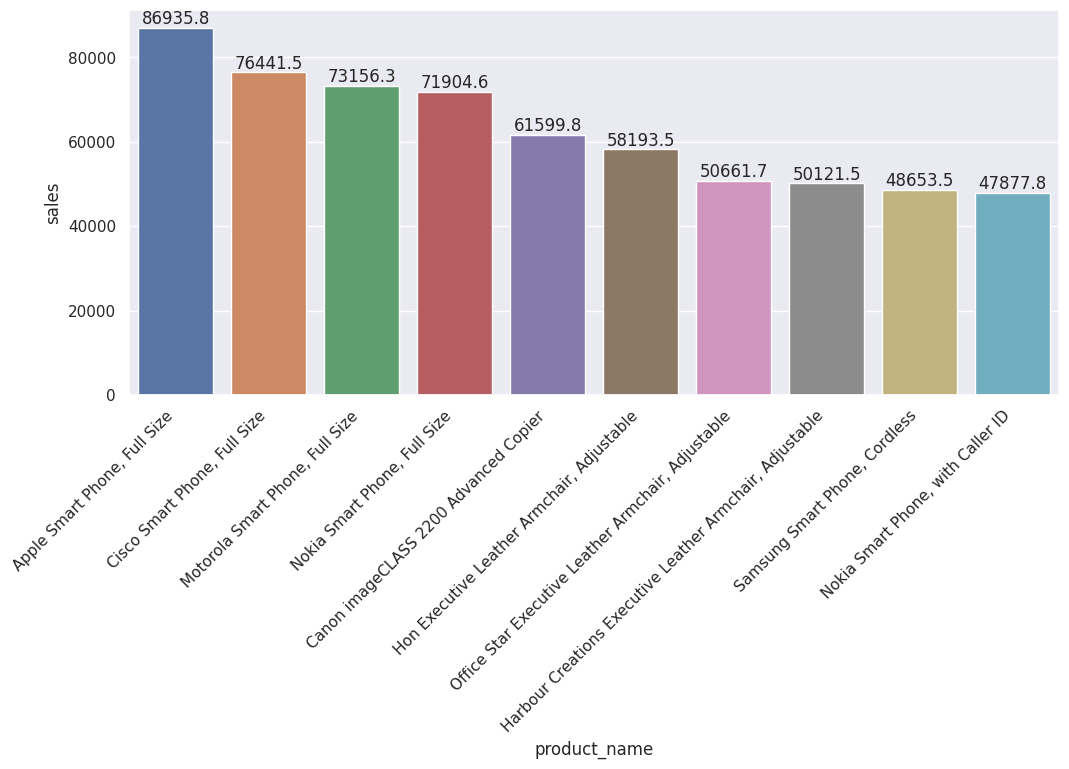

In [22]:

top_10_sales = prod_sales[:10]

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=top_10_sales, x=top_10_sales.index, y='sales')
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
df_sales.groupby("product_name").sum("quantity").sort_values("quantity",ascending = False)

,sales,quantity,discount,profit,shipping_cost
product_name,,,,,
Staples,7008.2000,876,21.20,2611.0694,731.430
"Cardinal Index Tab, Clear",1922.8302,337,10.32,556.3702,208.345
"Eldon File Cart, Single Width",34387.7287,321,8.82,4238.8887,3970.841
"Rogers File Cart, Single Width",29466.3053,262,16.26,2394.8953,3136.280
"Sanford Pencil Sharpener, Water Color",5581.9741,259,10.66,601.9441,570.373
...,...,...,...,...,...
Penpower WorldCard Pro Card Scanner,91.4750,1,0.50,-1.8295,10.930
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",119.8330,1,0.15,-12.6882,13.470
Boston 1900 Electric Pencil Sharpener,14.9800,1,0.00,4.4940,2.080


In [24]:
# Group the data by 'product_name' and calculate the sum of quantity sold for each product
product_quantity_sold= pd.DataFrame(df_sales.groupby("product_name").sum("quantity").sort_values("quantity",ascending = False))

In [25]:
# Display the top 10 products by quantity sold
product_quantity_sold[:10]

,sales,quantity,discount,profit,shipping_cost
product_name,,,,,
Staples,7008.2000,876,21.20,2611.0694,731.430
"Cardinal Index Tab, Clear",1922.8302,337,10.32,556.3702,208.345
"Eldon File Cart, Single Width",34387.7287,321,8.82,4238.8887,3970.841
"Rogers File Cart, Single Width",29466.3053,262,16.26,2394.8953,3136.280
"Sanford Pencil Sharpener, Water Color",5581.9741,259,10.66,601.9441,570.373
"Stockwell Paper Clips, Assorted Sizes",2395.4378,253,9.86,251.2878,269.211
"Avery Index Tab, Clear",1312.9488,252,9.01,221.5388,140.505
"Ibico Index Tab, Clear",1807.1811,251,10.71,125.6411,193.248
"Smead File Cart, Single Width",25397.1708,250,13.06,-237.6692,3036.454


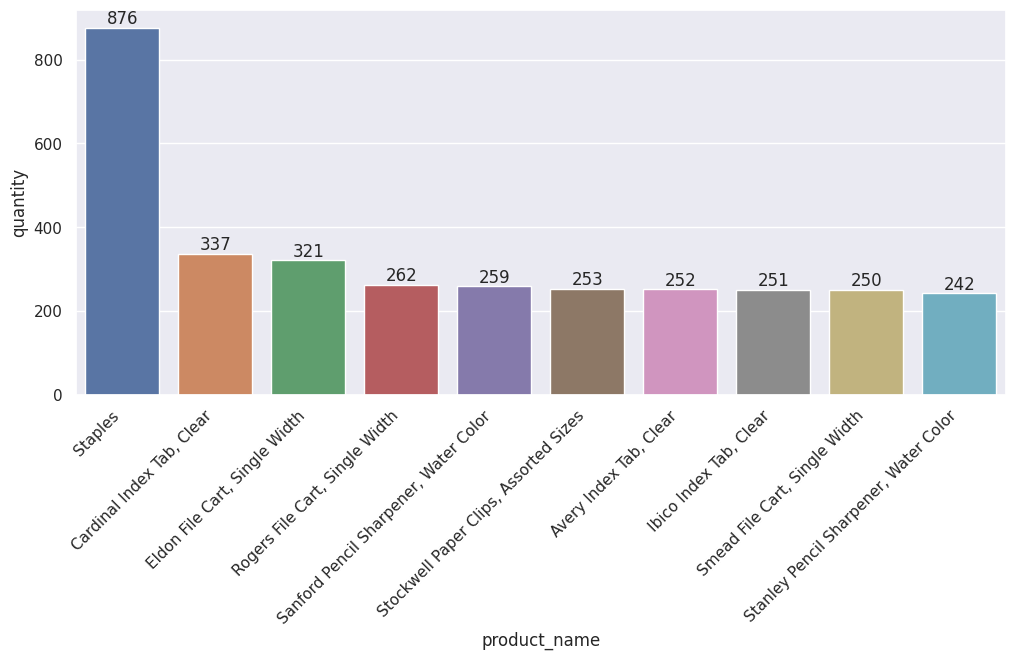

In [26]:
# Plot the top 10 products by quantity sold
top_10_quantity = product_quantity_sold[:10]

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=top_10_quantity, x=top_10_quantity.index, y='quantity')
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='ship_mode', ylabel='count'>

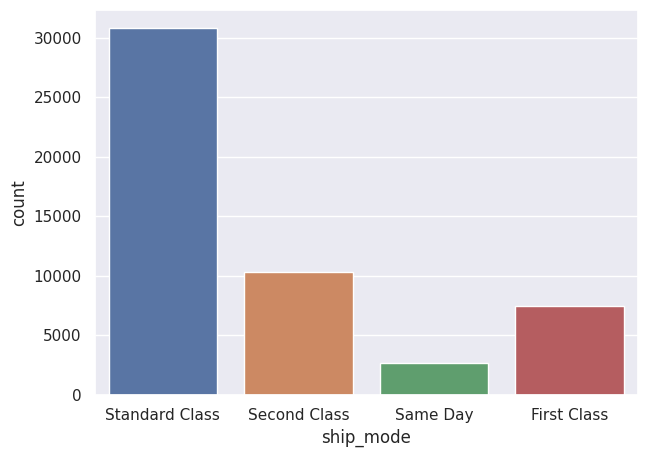

In [32]:
# Plot the count of each shipping mode
plt.figure(figsize=(7, 5))
sns.countplot(data = df_sales, x = "ship_mode")

In [28]:
(df_sales.groupby(["category"]).sum("profit").sort_values("profit",ascending = False))

,sales,quantity,discount,profit,shipping_cost
category,,,,,
Technology,4.744557e+06,35176,1372.508,663778.73318,507047.8794
Office Supplies,3.787070e+06,108182,4297.190,518473.83430,405448.3450
Furniture,4.110874e+06,34954,1660.030,286782.25380,440319.4790


In [33]:
# Group the data by 'category' and calculate the sum of profit for each category
cat_profit  = pd.DataFrame(df_sales.groupby(["category"]).sum("profit").sort_values("profit",ascending = False))

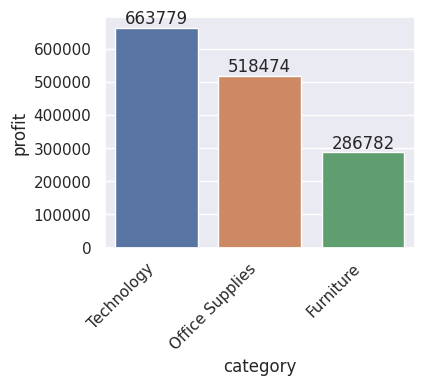

In [45]:
# Plot the total profit for each category
plt.figure(figsize=(4,3))
ax = sns.barplot(data=cat_profit , x=cat_profit .index, y='profit')
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)

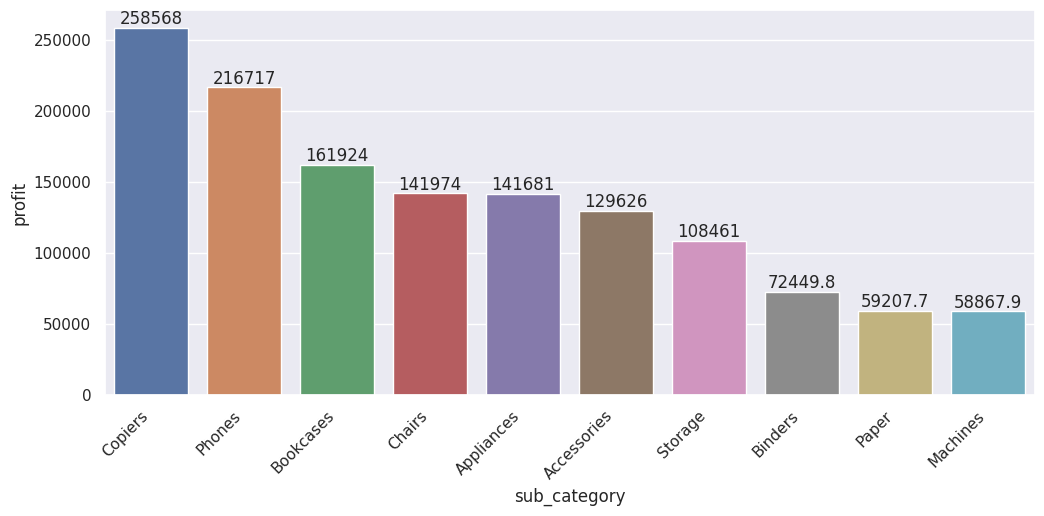

In [47]:
# Plot the total profit for each category
plt.figure(figsize=(12,5))
ax = sns.barplot(data=subcat_profit, x=subcat_profit.index, y='profit')
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)